# Two real signals, added on-off to one of the independent component

44100
44100
206848
199680


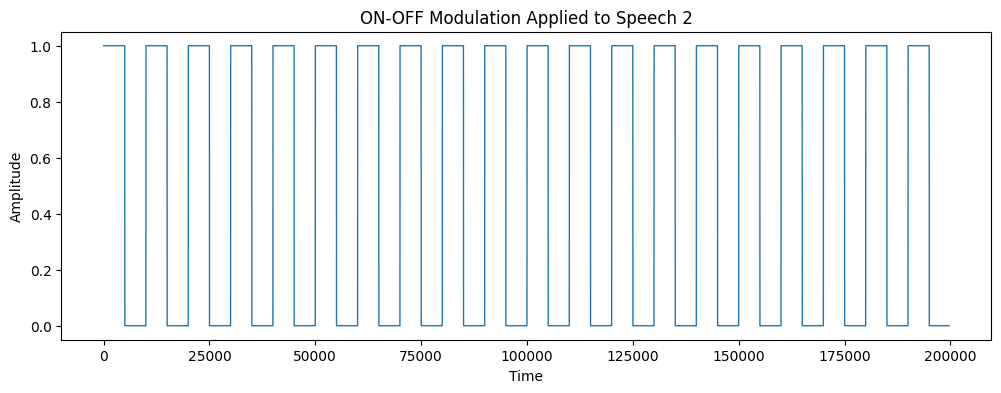

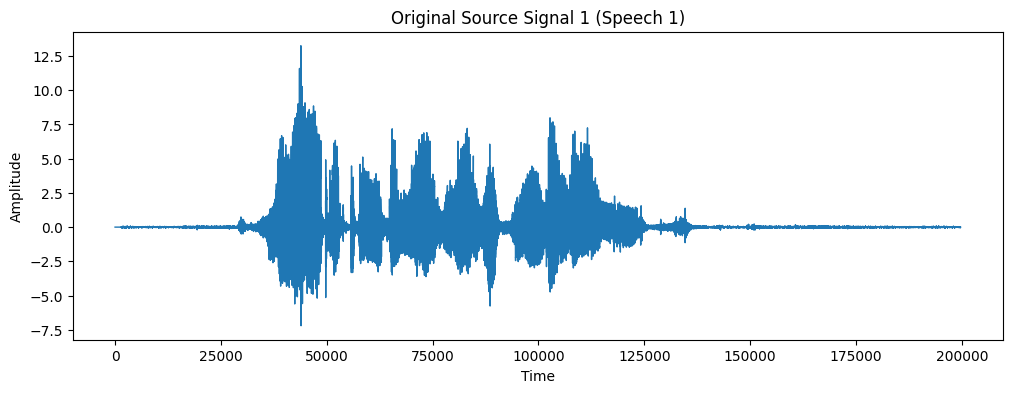

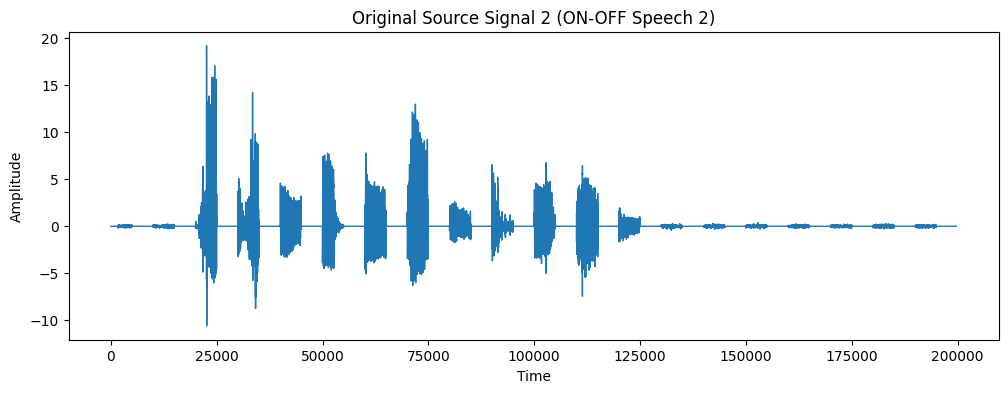

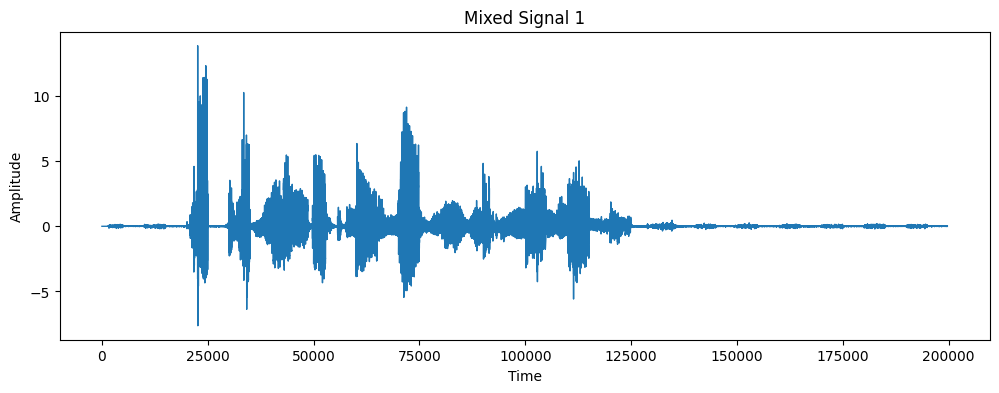

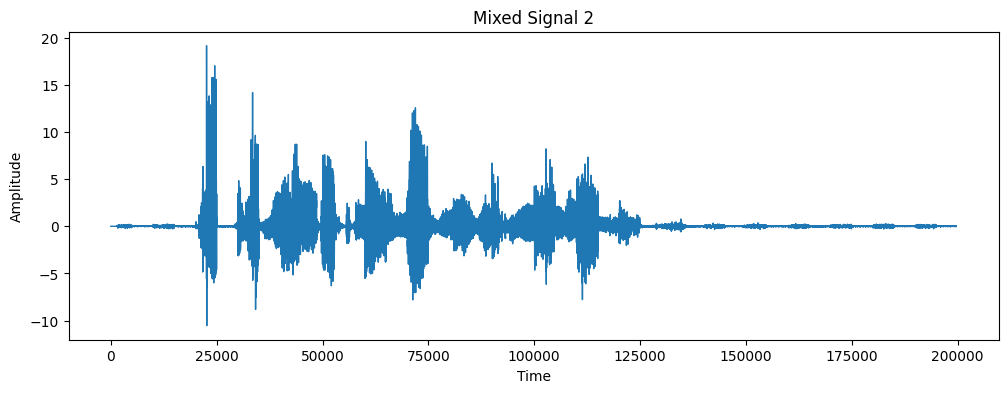

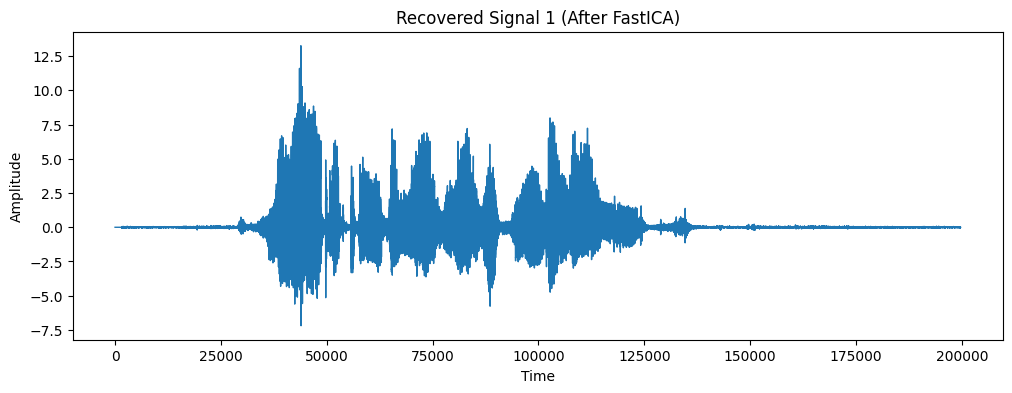

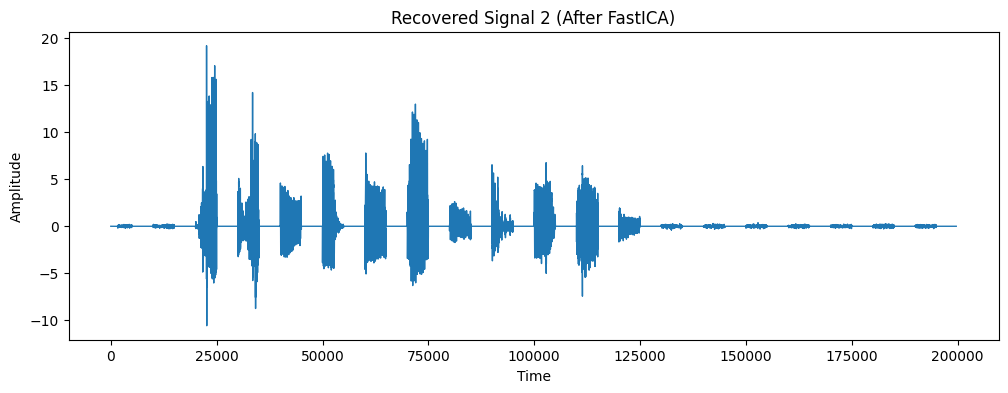

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.decomposition import FastICA

m = 50000
fs1, speech1 = wavfile.read('Dev1.wav')
fs2, speech2 = wavfile.read('Dev2.wav')
print(fs1)
print(fs2)

print(len(speech1))
print(len(speech2))

if(len(speech1)>len(speech2)) :
  m=len(speech2)
else:
  m=len(speech1)

speech1 = speech1[:m].astype(np.float64)
speech2 = speech2[:m].astype(np.float64)

block_size = 5000  # ON duration = 5000, OFF duration = 5000
on_off_signal = np.zeros(m)  # Initialize as all OFF (0)

for i in range(0, m, 2 * block_size):  # Every 10,000 samples
    on_off_signal[i:i + block_size] = 1  # Set ON for 5000 samples


speech2 = speech2 * on_off_signal

gaussian_noise1 = np.random.normal(0, 0.01, m)
gaussian_noise2 = np.random.normal(0, 0.01, m)

speech1 += gaussian_noise1
speech2 += gaussian_noise2

S = np.vstack([speech1, speech2])

S /= S.std(axis=1, keepdims=True)

n = S.shape[0]
A = np.random.rand(n, n)  # Real-valued random mixing matrix
X = A.dot(S)  # Mixed signals

ica = FastICA(n_components=n, max_iter=200, random_state=42)
S_estimated = ica.fit_transform(X.T).T  # FastICA returns transposed data

# Function to plot signals separately for full duration
def plot_signal(signal, title, xlabel="Time", ylabel="Amplitude"):
    plt.figure(figsize=(12, 4))
    plt.plot(signal, linewidth=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_signal(on_off_signal, "ON-OFF Modulation Applied to Speech 2")

plot_signal(S[0], "Original Source Signal 1 (Speech 1)")
plot_signal(S[1], "Original Source Signal 2 (ON-OFF Speech 2)")

plot_signal(X[0], "Mixed Signal 1")
plot_signal(X[1], "Mixed Signal 2")

plot_signal(S_estimated[0], "Recovered Signal 1 (After FastICA)")
plot_signal(S_estimated[1], "Recovered Signal 2 (After FastICA)")


# Sklearn's FastICA (Real Signals)

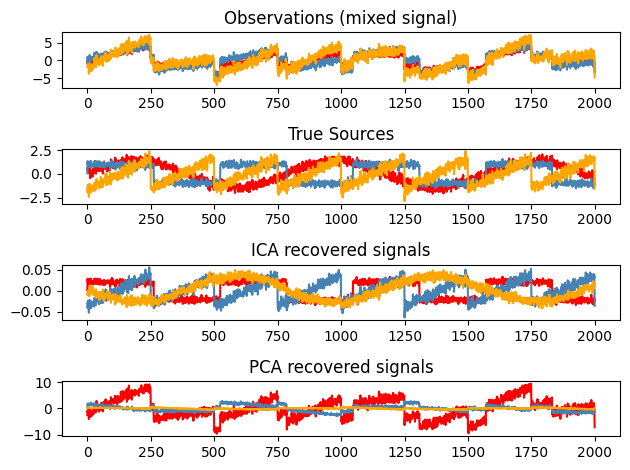

In [3]:
import numpy as np
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

from sklearn.decomposition import PCA, FastICA

# Compute ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components


import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

Mixing matrix with identical rows

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


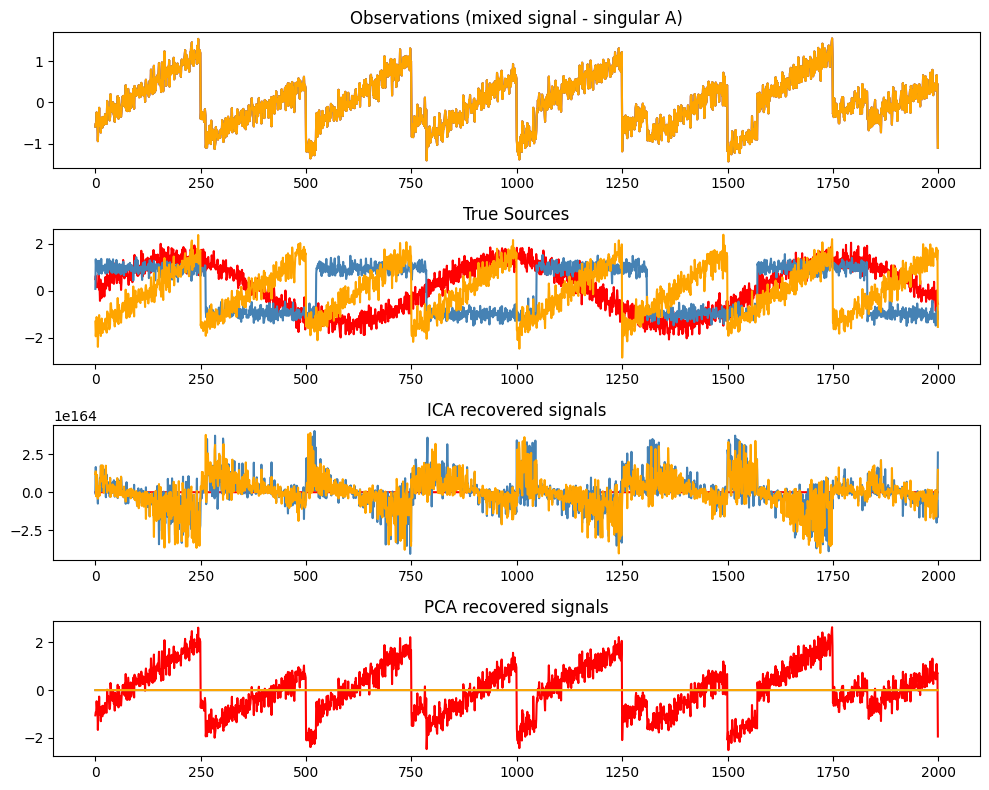

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic signals
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Square wave
s3 = signal.sawtooth(2 * np.pi * time)  # Sawtooth wave

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize

# Mixing matrix with identical rows (Singular Case)
A = np.array([[0.1, 0.3, 0.5], [0.1, 0.3, 0.5], [0.1, 0.3, 0.5]])  # All rows are identical
X = np.dot(S, A.T)  # Generate observations

# Apply ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Attempt to reconstruct sources
A_ = ica.mixing_  # Estimated mixing matrix

# Apply PCA for comparison
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # PCA-based reconstruction

# Plot results
plt.figure(figsize=(10, 8))

models = [X, S, S_, H]
names = [
    "Observations (mixed signal - singular A)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for i, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, i)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()


Taking singular mixing matrix (not invertible) - ica doesn't converge

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


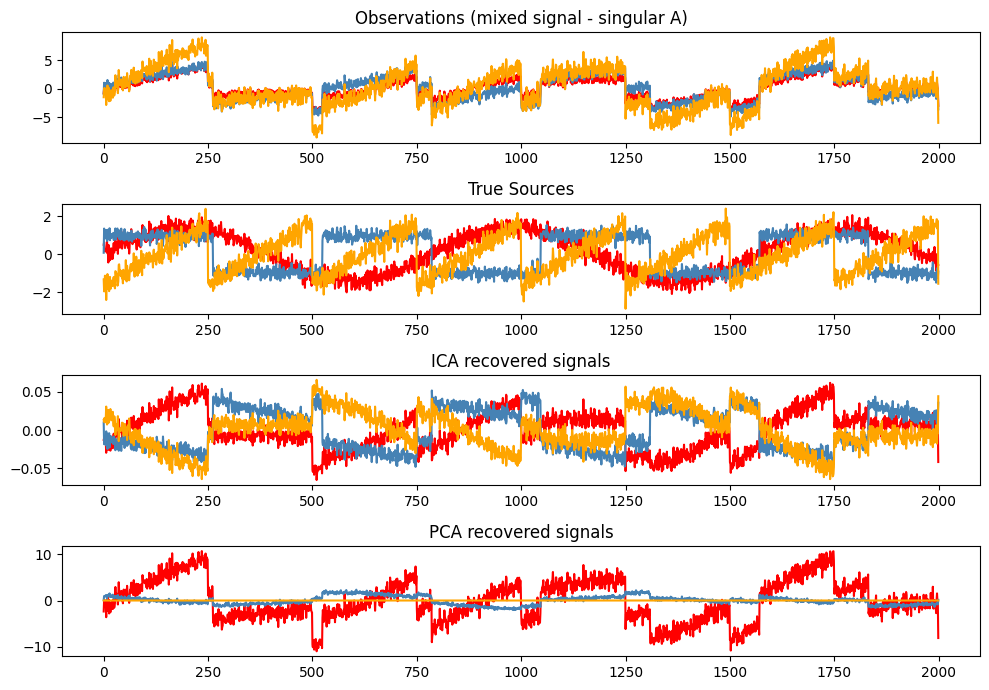

In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Define source signals
s1 = np.sin(2 * time)  # Sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Square wave
s3 = signal.sawtooth(2 * np.pi * time)  # Sawtooth wave

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data

# Define a Singular Mixing Matrix
A = np.array([[1, 1, 1], [0.5, 2, 1], [2, 2, 2]])

# Generate mixed signals
X = np.dot(S, A.T)

# Apply ICA
ica = FastICA(n_components=3, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Recovered signals
A_ = ica.mixing_  # Estimated mixing matrix

# Apply PCA for comparison
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # PCA-reconstructed signals

# Plot results
plt.figure(figsize=(10, 7))
models = [X, S, S_, H]
names = [
    "Observations (mixed signal - singular A)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()


Extracting only two independent components (works)

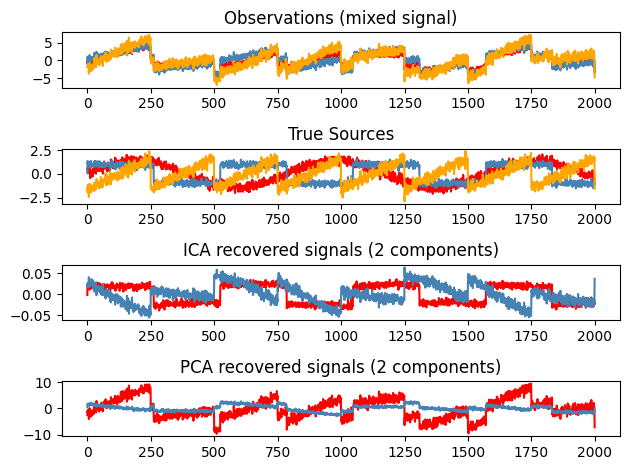

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data

# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA with fewer components (2 instead of 3)
ica = FastICA(n_components=2, whiten="arbitrary-variance")
S_ = ica.fit_transform(X)  # Reconstruct signals

# For comparison, compute PCA
pca = PCA(n_components=2)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# Plot results
plt.figure()

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals (2 components)",
    "PCA recovered signals (2 components)",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors[:model.shape[1]]):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()